In [1]:
import sys
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0, '../')
import lib.feature as ft

In [2]:
# Load the audio file 
audio_path = '../data/misc_songs/Bohemian Rhapsody.mp3'
audio_signal, sr = librosa.load(audio_path)

In [3]:
# Data on this track from tracks.csv
tracks = pd.read_csv('../data/meta/tracks.csv')
track = tracks.query("track_id == '12t6wktp' and mix_id == 'jwmtj61'").squeeze()

print(f"Mix ID: {track['mix_id']}")
print(f"Track ID: {track['track_id']}")
print(f"BPM: {track['bpm']}")
print(f"Key: {track['key']}")
print(f"Audio Sample Rate: {track['audio_sr']}")
print(f"Audio Length: {track['audio_length']} seconds")
print(f"Audio Size: {track['audio_size']} MB")

Mix ID: jwmtj61
Track ID: 12t6wktp
BPM: 122.4489795918
Key: Eb major
Audio Sample Rate: 44100
Audio Length: 202.9303401361 seconds
Audio Size: 3.097495079 MB


Beat Activations:
[0.01889947 0.00597065 0.00286582 ... 0.00364756 0.00717794 0.01441207]
Length of array: 35540


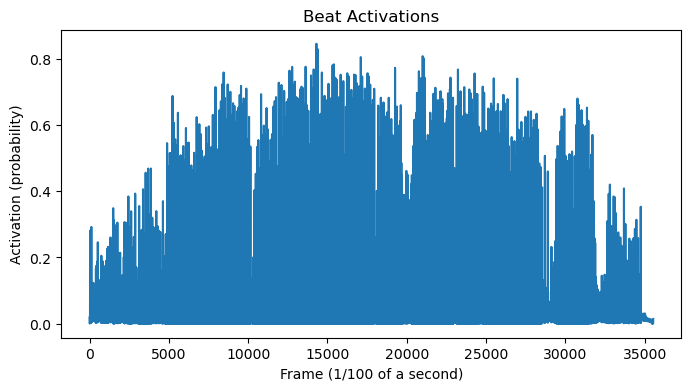

In [4]:
# Compute beat activations
beat_activations = ft.beat_activations(audio_path)

print('Beat Activations:')
print(beat_activations)
print(f"Length of array: {len(beat_activations)}")

plt.figure(figsize=(8, 4))
plt.plot(beat_activations)
plt.title('Beat Activations')
plt.xlabel('Frame (1/100 of a second)')
plt.ylabel('Activation (probability)')
plt.show()

First 12 values of beat_times: [0.31 0.72 1.12 1.53 1.95 2.36 2.76 3.16 3.58 3.99 4.4  4.8 ]
Difference between these beat_times: [0.41 0.4  0.41 0.42 0.41 0.4  0.4  0.42 0.41 0.41 0.4 ]


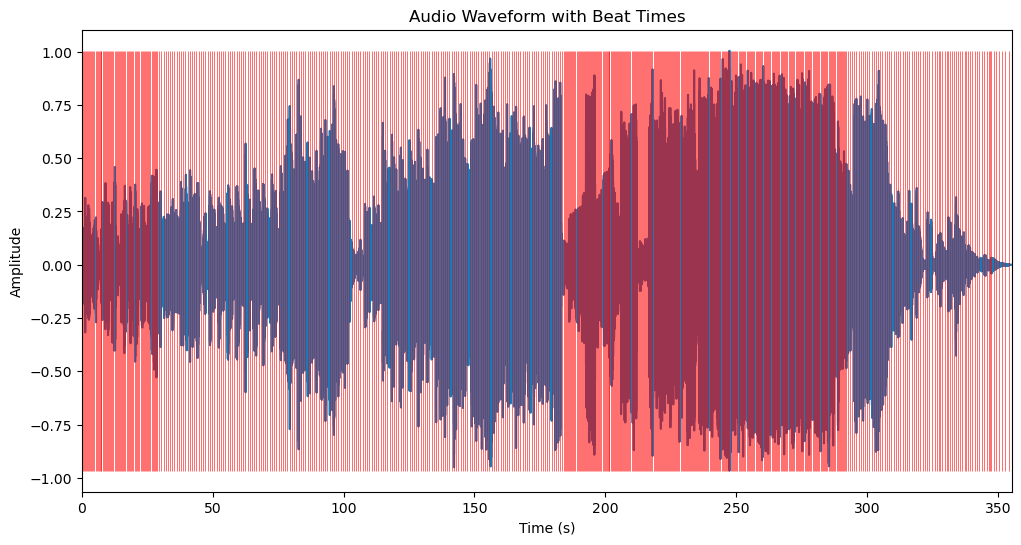

In [5]:
# Compute beat times
beat_times = ft.beat_times(audio_path)
print("First 12 values of beat_times:", beat_times[:12])
print("Difference between these beat_times:", np.diff(beat_times[:12]))

# Plot the audio waveform
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(audio_signal)) / sr, audio_signal)

# Create thin vertical lines at the beat times
plt.vlines(beat_times, np.min(audio_signal), np.max(audio_signal), colors='r', linestyles='solid', linewidths=0.4)

# Set the x-axis limits to the duration of the audio file
plt.xlim(0, len(audio_signal) / sr)

# Set the title and labels
plt.title('Audio Waveform with Beat Times')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Show the plot
plt.show()

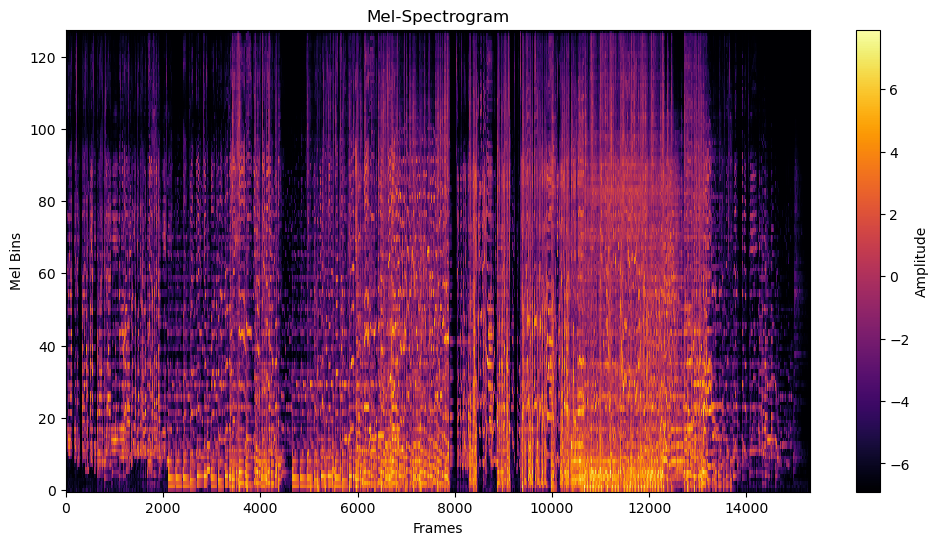

In [40]:
# Comput melspectrogram
melspectrogram = ft.melspectrogram(audio_path)
HOP_LENGTH = 512
SAMPLING_RATE = 22050

# Create an image of the melspectrogram
plt.figure(figsize=(12, 6))
plt.imshow(melspectrogram, cmap='inferno', origin='lower', aspect='auto', interpolation='none')
plt.xlabel('Frames')
plt.ylabel('Mel Bins')
plt.title('Mel-Spectrogram')
plt.colorbar(label='Amplitude')
plt.show()

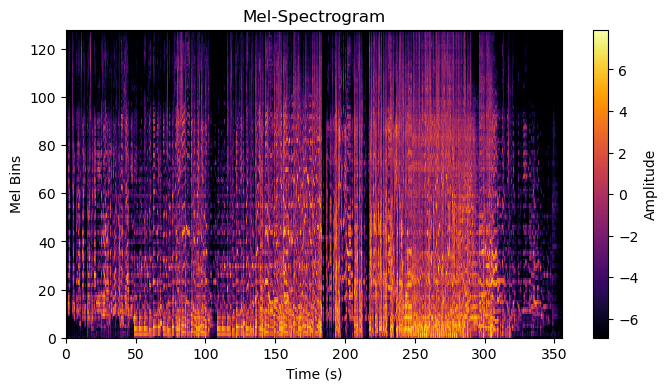

In [39]:
# Create an image of the time Mel-spectrogram
plt.figure(figsize=(8, 4))

# Convert frames to time in seconds
time_axis = np.arange(melspectrogram.shape[1]) * HOP_LENGTH / sr

plt.imshow(melspectrogram, cmap='inferno', origin='lower', aspect='auto', interpolation='none',
           extent=[time_axis[0], time_axis[-1], 0, melspectrogram.shape[0]])
plt.xlabel('Time (s)')
plt.ylabel('Mel Bins')
plt.title('Mel-Spectrogram')
plt.colorbar(label='Amplitude')
plt.show()

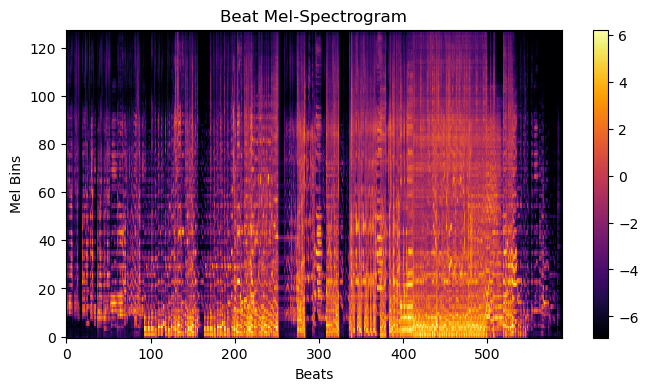

In [ ]:
# Calculate the beat Mel-spectrogram
beat_melspectrogram = ft.beat_melspectrogram(audio_path)

# Create an image of the beat Mel-spectrogram
plt.figure(figsize=(8, 4))
plt.imshow(beat_melspectrogram, cmap='inferno', origin='lower', aspect='auto', interpolation='none')
plt.xlabel('Beats')
plt.ylabel('Mel Bins')
plt.title('Beat-Aggregated Mel-Spectrogram')
plt.colorbar()
plt.show()

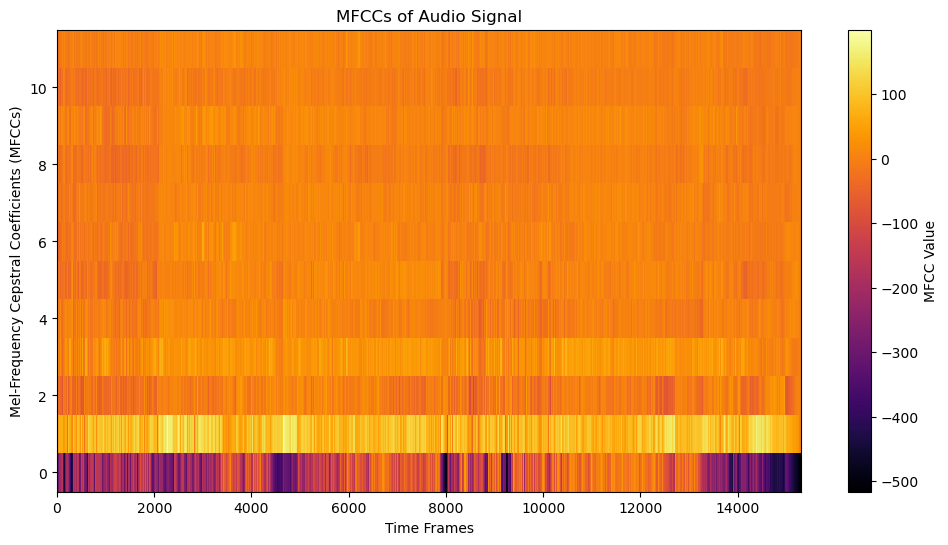

In [37]:
# Compute MFCCs
mfccs = ft.mfcc(audio_path)

# Create an image of the MFCCs
plt.figure(figsize=(12, 6))
plt.imshow(mfccs, cmap='inferno', origin='lower', aspect='auto', interpolation='none')
plt.xlabel('Time Frames')
plt.ylabel('Mel-Frequency Cepstral Coefficients (MFCCs)')
plt.title('MFCCs of Audio Signal')
plt.colorbar(label='MFCC Value')
plt.show()

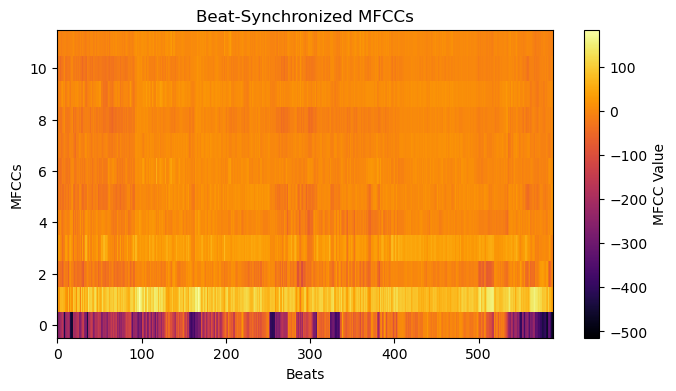

In [ ]:
# Compute beat MFCCs
beat_mfccs = ft.beat_mfcc(audio_path)

# Create an image of the beat MFCCs
plt.figure(figsize=(8, 4))
plt.imshow(beat_mfccs, cmap='inferno', origin='lower', aspect='auto', interpolation='none')
plt.xlabel('Beats')
plt.ylabel('MFCCs')
plt.title('Beat-Aggregated MFCCs')
plt.colorbar(label='MFCC Value')
plt.show()

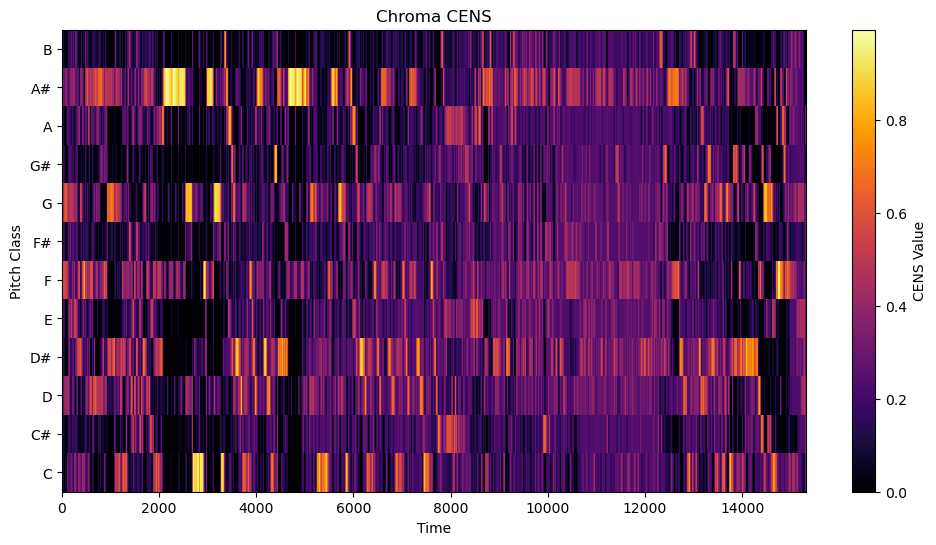

In [50]:
# Compute chroma CENS
chroma_cens = ft.chroma_cens(audio_path)

# Create an image of the chroma CENS
plt.figure(figsize=(12, 6))
plt.imshow(chroma_cens, cmap='inferno', origin='lower', aspect='auto', interpolation='none')

pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.yticks(np.arange(12), pitch_classes)
plt.ylabel('Pitch Class')

plt.xlabel('Time')
plt.title('Chroma CENS')
plt.colorbar(label='CENS Value')
plt.show()

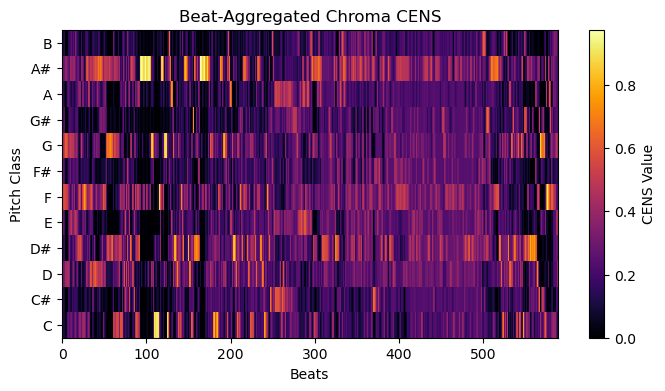

In [49]:
# Compute beat chroma CENS
beat_chroma_cens = ft.beat_chroma_cens(audio_path)

# Create an image of the beat chroma CENS
plt.figure(figsize=(8, 4))
plt.imshow(beat_chroma_cens, cmap='inferno', origin='lower', aspect='auto', interpolation='none')

pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.yticks(np.arange(12), pitch_classes)
plt.ylabel('Pitch Class')

plt.xlabel('Beats')
plt.title('Beat-Aggregated Chroma CENS')
plt.colorbar(label='CENS Value')
plt.show()

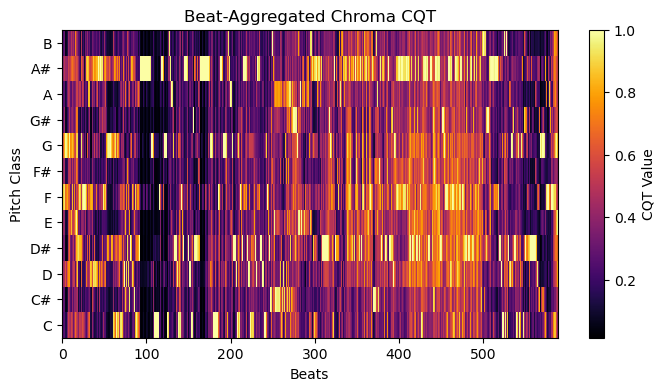

In [ ]:
# Compute beat chroma CQT
beat_chroma_cqt = ft.beat_chroma_cqt(audio_path)

# Create an image of the beat chroma CENS
plt.figure(figsize=(8, 4))
plt.imshow(beat_chroma_cqt, cmap='inferno', origin='lower', aspect='auto', interpolation='none')

pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.yticks(np.arange(12), pitch_classes)
plt.ylabel('Pitch Class')

plt.xlabel('Beats')
plt.title('Beat-Aggregated Chroma CQT')
plt.colorbar(label='CQT Value')
plt.show()